Saheedah Yusuf
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [29]:
#splitting the date into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#Create and fit the model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

model_1.__dict__



{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 10,
 'coef_': array([ 61.33476304,  65.04876403,  68.66707447, -64.9374315 ,
         84.31845599, 106.04792278,  83.84915791,   2.23422649,
        -33.75943194, -63.15150847]),
 'rank_': 10,
 'singular_': array([0.89790545, 0.83700989, 0.77922074, 0.67836009, 0.56151894,
        0.49315667, 0.42302387, 0.40066464, 0.37735871, 0.34721248]),
 'intercept_': 32.25629787277876}

In [37]:
print(coef)
print(bias)

[62.20691253 23.10961275 75.06903717 16.58670295 75.64703855 86.85889989
  0.          0.          0.          0.        ]
32.48690727326483


In [38]:
# Your code here. Add cells as needed.

#### Your written answers here

What are your model parameters?
 - 

What were your MSE and R^2?
 - 



1. What are your model parameters?
The parameters of the trained Linear Regression model are:

Coefficients (weights for each feature in the model):

[62.2069,23.1096,75.0690,16.5867,75.6470,86.8589]

These values represent the impact of each predictor variable (x1 to x5) on the target variable (y).

Intercept (bias term):

32.4869

This is the baseline prediction when all predictor values are zero.


2. What were your MSE and R²?
R² (Coefficient of Determination): 0.9523

This means that 95.23% of the variance in the target variable is explained by the predictor variables which shows a strong model fit.
MSE (Mean Squared Error): 1131.99

This is the average squared difference between actual and predicted values. Lower MSE means better prediction accuracy.

## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [76]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 1 --> simple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]). reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578
...,...,...,...,...,...,...,...,...,...,...,...
295,0.033185,-0.075321,0.052960,-0.003697,0.096823,-0.053486,0.020781,0.008049,-0.005098,0.010381,-10.690334
296,0.036346,-0.018425,-0.013462,0.021404,-0.004093,-0.001489,0.049048,0.000154,0.031826,-0.008673,-18.209533
297,-0.001014,-0.073223,0.026779,0.024211,-0.042056,0.014678,-0.007562,0.000057,-0.040801,0.021938,-19.360755
298,-0.025448,0.043475,0.029118,0.053766,-0.031705,0.033905,-0.016191,0.072865,-0.004394,0.031033,-9.283116


In [82]:
candidate_idx = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])-1
Z = X[:, candidate_idx]
Z_names = [column_names(idx) for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

print(f'R2_train: {R2_train:.2f}\nR2_test: {R2_test:.2f}')

InvalidIndexError: (slice(None, None, None), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

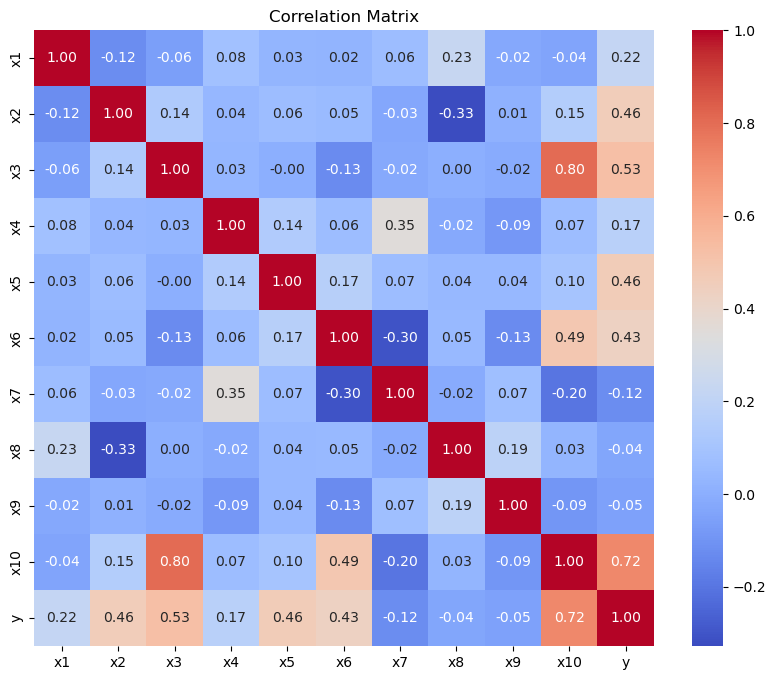

Model Coefficients: [   195.36489918 -38564.20516967 104154.10935464]
Intercept: -583398.2487284823
R-squared (R²): 0.5371160102559972
Mean Squared Error (MSE): 79894226121.78857


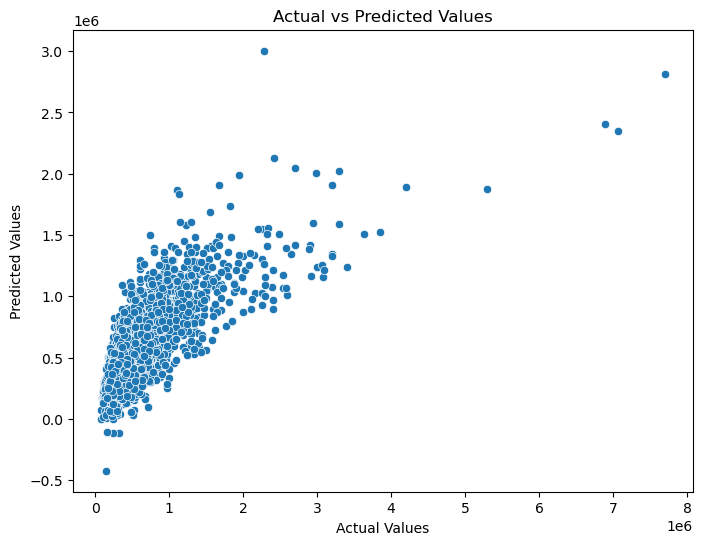

In [85]:
# Show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(reg2_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Ensure necessary imports for evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display results
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared (R²):", r2)
print("Mean Squared Error (MSE):", mse)

# Plot predicted vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()



#### Your written answers here

What are your model parameters?
 - 

Which features (x1, x2...) were significant? Which were co-linear?
 - 
 
What were your MSE and R^2?
 - 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [86]:
housing_df = pd.read_csv('kc_house_data.csv')

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


                        Model  R² Score           MSE
0  Multiple Linear Regression  0.537116  7.989423e+10
1            Ridge Regression  0.537072  7.990189e+10
2            Lasso Regression  0.537112  7.989491e+10


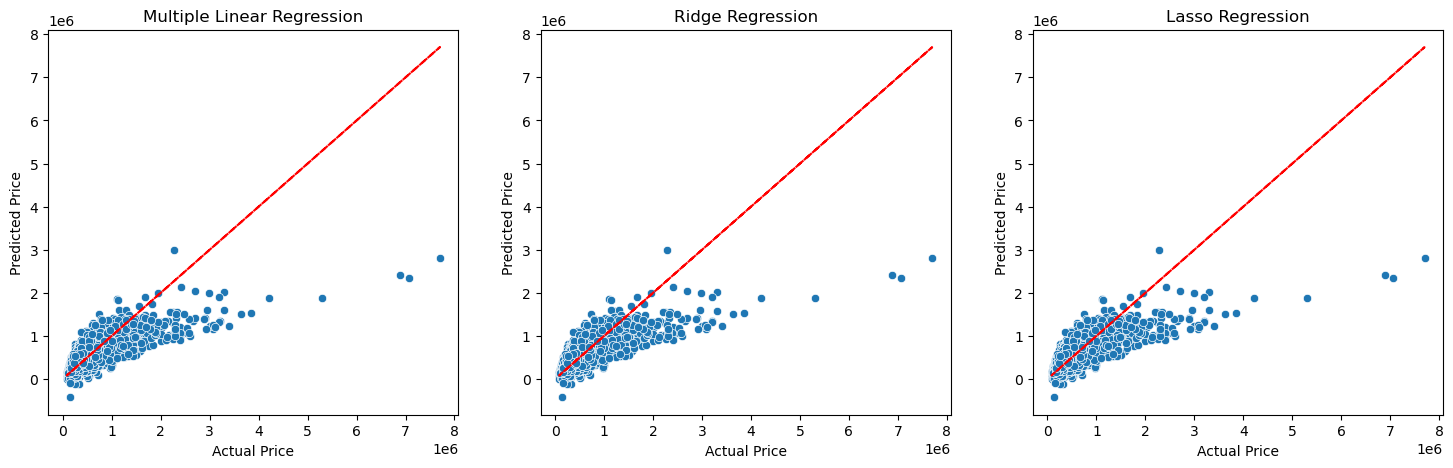

          Model  R² Score           MSE
0  Ridge (<$1M)  0.451339  2.069438e+10
1  Ridge (>$1M)  0.354419  3.112384e+11


In [87]:
# Your code here. Add cells as needed.
# Ensure StandardScaler is defined
scaler = StandardScaler()

# Select three features for regression
selected_features = ['sqft_living', 'bathrooms', 'grade']
X = housing_df[selected_features]
y = housing_df['price']

# Standardize features
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Train Multiple Linear Regression Model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred_mlr = mlr_model.predict(X_test)

# Train Ridge Regression Model
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Train Lasso Regression Model
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate models
models = {
    "Multiple Linear Regression": (y_test, y_pred_mlr),
    "Ridge Regression": (y_test, y_pred_ridge),
    "Lasso Regression": (y_test, y_pred_lasso)
}

results = []
for model_name, (actual, predicted) in models.items():
    r2 = r2_score(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    results.append([model_name, r2, mse])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MSE"])
print(results_df)

# Plot predicted vs actual values
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, (model_name, (actual, predicted)) in enumerate(models.items()):
    sns.scatterplot(x=actual, y=predicted, ax=ax[i])
    ax[i].plot(actual, actual, color='red', linestyle='dashed')
    ax[i].set_title(model_name)
    ax[i].set_xlabel("Actual Price")
    ax[i].set_ylabel("Predicted Price")
plt.show()

# Split data into below and above $1M
low_price_df = housing_df[housing_df['price'] < 1_000_000]
high_price_df = housing_df[housing_df['price'] >= 1_000_000]

X_low = scaler.fit_transform(low_price_df[selected_features])
y_low = low_price_df['price']
X_high = scaler.fit_transform(high_price_df[selected_features])
y_high = high_price_df['price']

X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2, random_state=1)
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.2, random_state=1)

# Train separate Ridge models
ridge_low = Ridge(alpha=10)
ridge_low.fit(X_low_train, y_low_train)
y_pred_low = ridge_low.predict(X_low_test)

ridge_high = Ridge(alpha=10)
ridge_high.fit(X_high_train, y_high_train)
y_pred_high = ridge_high.predict(X_high_test)

# Evaluate split models
r2_low = r2_score(y_low_test, y_pred_low)
mse_low = mean_squared_error(y_low_test, y_pred_low)
r2_high = r2_score(y_high_test, y_pred_high)
mse_high = mean_squared_error(y_high_test, y_pred_high)

# Display results for split models
split_results_df = pd.DataFrame({
    "Model": ["Ridge (<$1M)", "Ridge (>$1M)"],
    "R² Score": [r2_low, r2_high],
    "MSE": [mse_low, mse_high]
})
print(split_results_df)


#### Your written answers here
Which features are you using and why?
 
 - Your written answer here.

- **sqft_living**: This feature is chosen because the size of the living space is a strong predictor of house prices.
- **bathrooms**: The number of bathrooms contributes to property valuation as more bathrooms generally increase home value.
- **grade**: This represents the quality of construction and design, which strongly impacts house price.


### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

Ridge Regression R² Score: 0.5366589329983111
Ridge Regression MSE: 79973118100.31842
Top 3 Most Important Features: ['sqft_living', 'grade', 'bathrooms']


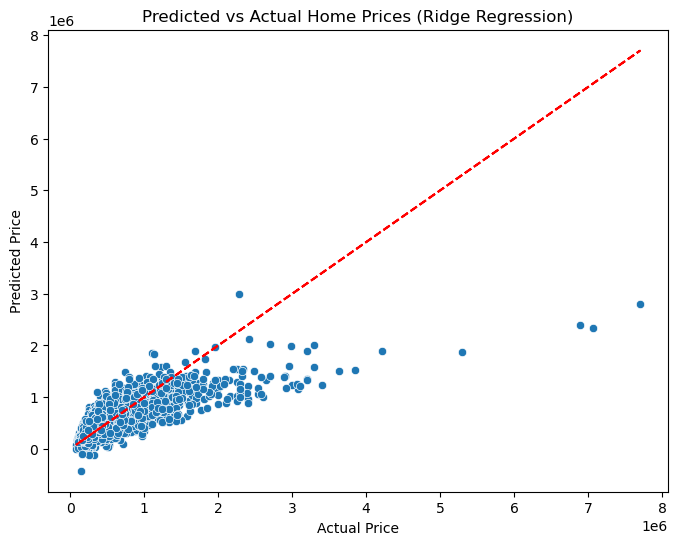

In [88]:
# Your code here. Add cells as needed.
# Save feature names
feature_names = X.columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Train Ridge Regression Model with tuned alpha
ridge_model = Ridge(alpha=100)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Identify the top 3 most significant features
sorted_indices = np.argsort(np.abs(ridge_model.coef_))[::-1]
top_features = [feature_names[i] for i in sorted_indices[:3]]

# Display model performance
print("Ridge Regression R² Score:", r2_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Top 3 Most Important Features:", top_features)

# Plot predicted vs actual home prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Home Prices (Ridge Regression)")
plt.show()


### Your written answers here
Which regression did you use?
 - Your answer

Does your regularized model look better than your MLR? How so?
 - Your answer

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [89]:
# Your code here. Add cells as needed.
# Split data into below and above $1M
low_price_df = housing_df[housing_df['price'] < 1_000_000]
high_price_df = housing_df[housing_df['price'] >= 1_000_000]

X_low = scaler.fit_transform(low_price_df[feature_columns])
y_low = low_price_df['price']
X_high = scaler.fit_transform(high_price_df[feature_columns])
y_high = high_price_df['price']

X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2, random_state=1)
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.2, random_state=1)

# Train separate Ridge models for each price segment
ridge_low = Ridge(alpha=100)
ridge_low.fit(X_low_train, y_low_train)
y_pred_low = ridge_low.predict(X_low_test)

ridge_high = Ridge(alpha=100)
ridge_high.fit(X_high_train, y_high_train)
y_pred_high = ridge_high.predict(X_high_test)

# Evaluate split models
r2_low = r2_score(y_low_test, y_pred_low)
mse_low = mean_squared_error(y_low_test, y_pred_low)
r2_high = r2_score(y_high_test, y_pred_high)
mse_high = mean_squared_error(y_high_test, y_pred_high)

# Display results for split models
print("Ridge Regression (<$1M) R² Score:", r2_low, "MSE:", mse_low)
print("Ridge Regression (>$1M) R² Score:", r2_high, "MSE:", mse_high)

# Plot predicted vs actual home prices for both models
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=y_low_test, y=y_pred_low, ax=ax[0])
ax[0].plot(y_low_test, y_low_test, color='red', linestyle='dashed')
ax[0].set_title("Predicted vs Actual Prices (<$1M)")
ax[0].set_xlabel("Actual Price")
ax[0].set_ylabel("Predicted Price")

sns.scatterplot(x=y_high_test, y=y_pred_high, ax=ax[1])
ax[1].plot(y_high_test, y_high_test, color='red', linestyle='dashed')
ax[1].set_title("Predicted vs Actual Prices (>$1M)")
ax[1].set_xlabel("Actual Price")
ax[1].set_ylabel("Predicted Price")

plt.show()


NameError: name 'feature_columns' is not defined

 ### Your written answers here

 What are the $R^2$ for the two models?

  - Your answer
 
